## Channle View

In [1]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import csv

from tabulate import tabulate

SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']

API_SERVICE_NAME = 'youtubeAnalytics'
API_VERSION = 'v2'
CLIENT_SECRETS_FILE = 'xav_client.json'

def get_service():
  flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
  credentials = flow.run_local_server()
  # alternatively (https://github.com/onlyphantom/youtube_api_python/pull/3/files):
  # credentials = flow.run_local_server()
  return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

def execute_api_request(client_library_function, **kwargs):
  response = client_library_function(
    **kwargs
  ).execute()
  return response

if __name__ == '__main__':

    youtubeAnalytics = get_service()
    result = execute_api_request(
        youtubeAnalytics.reports().query,
        ids='channel==UCaufk4I0YqJZ-yIk8TNMS9w',
        startDate='2023-03-11',
        endDate='2064-03-01',
        metrics= 'estimatedMinutesWatched,views,likes,comments,subscribersGained,shares,averageViewDuration,subscribersLost',
        dimensions= 'day',        
    )

estimated_min = []
views = []
like = []
comment = []
sub_g = []
shares = []
avg_view =[]
sub_lost = []
for i in range(len(result["rows"])):
   estimated_min.append(result["rows"][i][1])
   views.append(result["rows"][i][2])
   like.append(result["rows"][i][3])
   comment.append(result["rows"][i][4])
   sub_g.append(result["rows"][i][5])
   shares.append(result["rows"][i][6])
   avg_view.append(result["rows"][i][7])
   sub_lost.append(result["rows"][i][8])

print(f"estimated min : {sum(estimated_min)}")
print(f" views : {sum(views)}\n")
print(f" likes : {sum(like)}\n")
print(f" comments : {sum(comment)}\n")
print(f" subscribers gained : {sum(sub_g)}\n")
print(f" subscribers lost : {sum(sub_lost)}\n")
print(f" shares : {sum(shares)}\n")










Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=bFlNPlSt0qTdGcHFFmADViy77rYZ4u&access_type=offline
estimated min : 46998
 views : 10718

 likes : 229

 comments : 82

 subscribers gained : 437

 subscribers lost : 34

 shares : 377



## Each Video Data

In [4]:

from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import matplotlib.pyplot as plt

def basic_stats(video_id):

    SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']
    API_SERVICE_NAME = 'youtubeAnalytics'
    API_VERSION = 'v2'
    CLIENT_SECRETS_FILE = 'xav_client.json'

    def get_service():
        flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
        credentials = flow.run_local_server()
        return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

    def execute_api_request(client_library_function, **kwargs):
        response = client_library_function(
            **kwargs
        ).execute()
        return response

    if __name__ == '__main__':
        youtubeAnalytics = get_service()
        result = execute_api_request(
        youtubeAnalytics.reports().query,
        ids='channel==UCaufk4I0YqJZ-yIk8TNMS9w',
        startDate='2010-10-06',
        endDate='2033-12-29',
        metrics= 'estimatedMinutesWatched,views,likes,comments,subscribersGained,shares,videosAddedToPlaylists,averageViewPercentage,annotationClickThroughRate',
        dimensions= None,
        filters= f"video=={video_id}")

    result_dict = {}
    result_dict["Estimated_Minutes_Watched"] = result['rows'][0][0]
    result_dict["Views"] = result['rows'][0][1]
    result_dict["Likes"] = result['rows'][0][2]
    result_dict["Comments"] = result['rows'][0][3]
    result_dict["Sub_Gained"] = result['rows'][0][4]
    result_dict["Shares"] = result['rows'][0][5]    
    result_dict["Added_To_Playlist"] = result['rows'][0][6]
    result_dict["Average_View_Percentage"] = result['rows'][0][7]
    return result_dict
basic_stats("_c9raKiv9ws")

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=ZyD5yjthGpvmVCVVjb4A9hrkbDzsO6&access_type=offline


{'Estimated_Minutes_Watched': 2445,
 'Views': 716,
 'Likes': 17,
 'Comments': 13,
 'Sub_Gained': 11,
 'Shares': 23,
 'Added_To_Playlist': 23,
 'Average_View_Percentage': 59.4,
 'annotationClickThroughRate': 0}

## Reach Data

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=JP93fZRHDGjG5ktox37BHyP7xzUpT9&access_type=offline
Video ID: _c9raKiv9ws
Viewer Sources:
- NO_LINK_OTHER: 21 views
- SUBSCRIBER: 161 views
- YT_CHANNEL: 90 views
- YT_SEARCH: 65 views
- RELATED_VIDEO: 53 views
- YT_OTHER_PAGE: 11 views
- EXT_URL: 84 views
- PLAYLIST: 3 views
- NOTIFICATION: 12 views
- SHORTS_CONTENT_LINKS: 17 views
------------------------


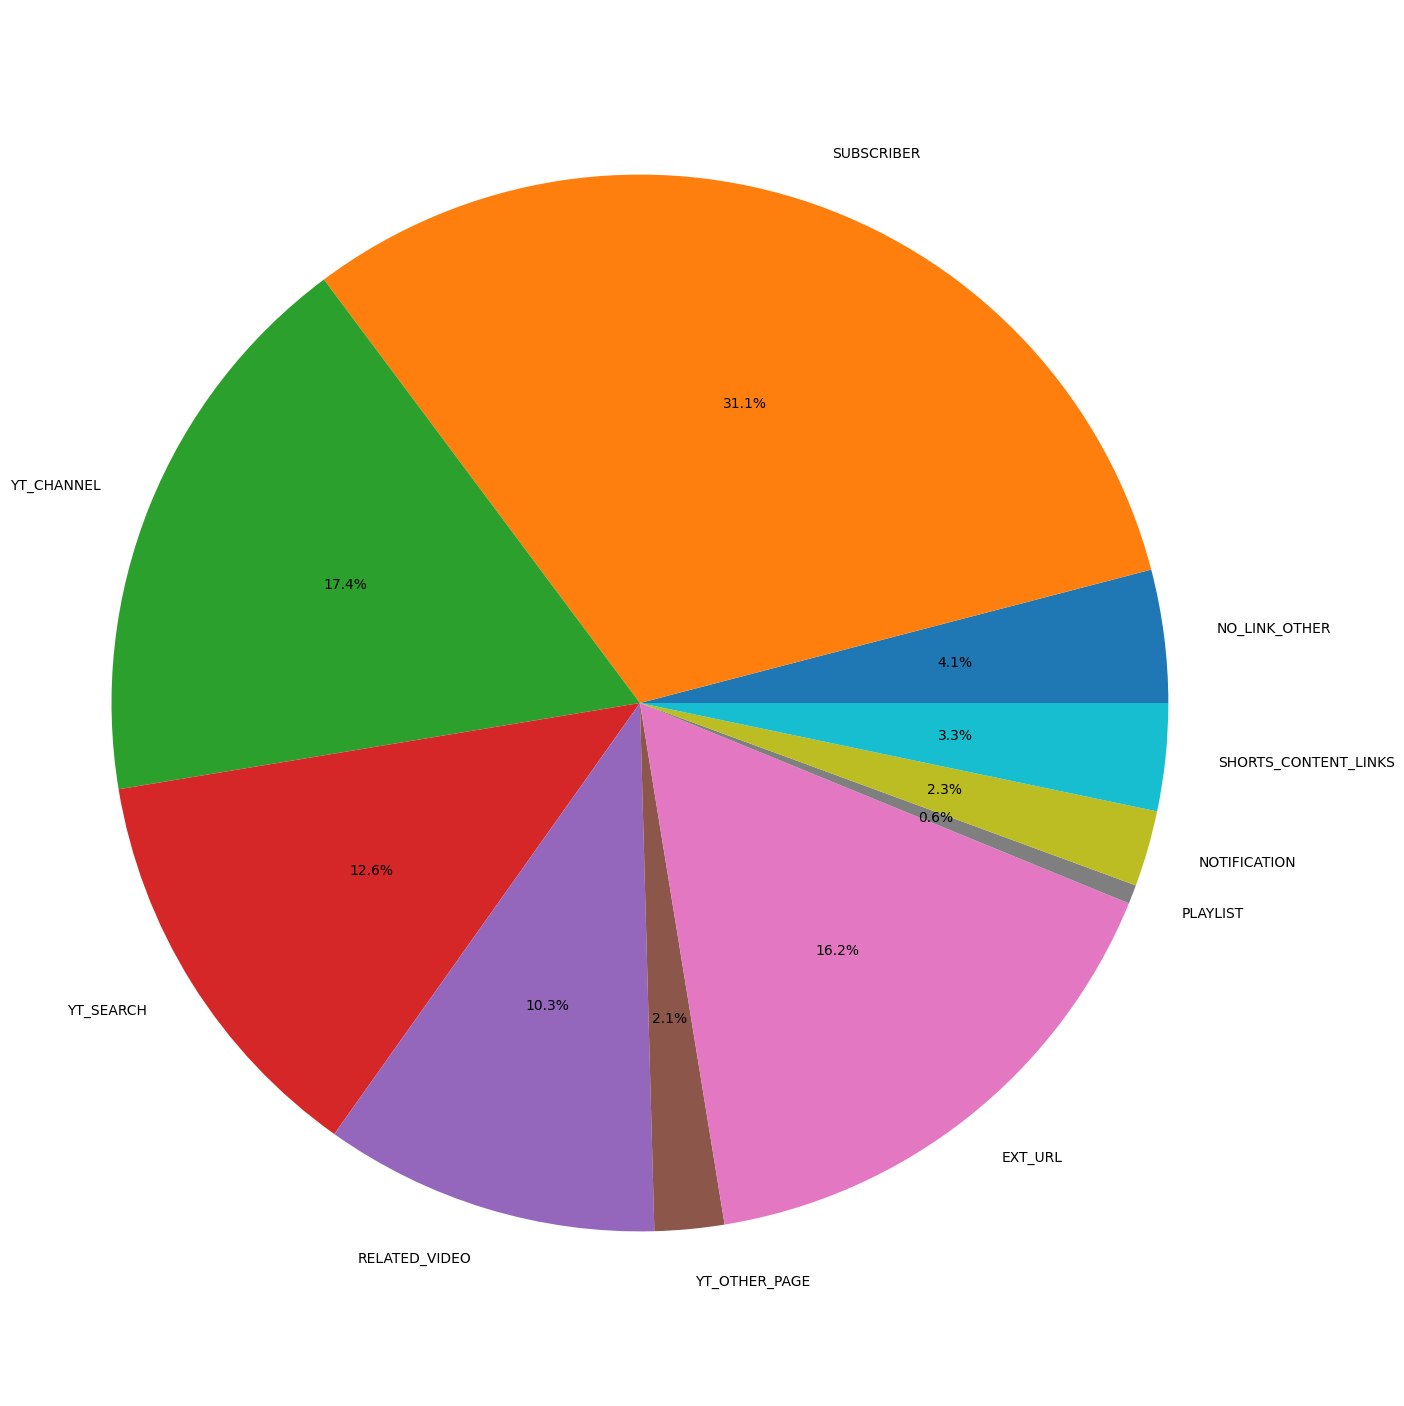

In [11]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import matplotlib.pyplot as plt
import numpy as np


def reach(video_id):
    SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']
    API_SERVICE_NAME = 'youtubeAnalytics'
    API_VERSION = 'v2'
    CLIENT_SECRETS_FILE = 'xav_client.json'

    flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
    credentials = flow.run_local_server()
    # alternatively (https://github.com/onlyphantom/youtube_api_python/pull/3/files):
    # credentials = flow.run_local_server()
    youtube_analytics = build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

    # Iterate over the video IDs
    try:
        # Retrieve viewer sources
        analytics_response = youtube_analytics.reports().query(
            ids="channel==UCaufk4I0YqJZ-yIk8TNMS9w",
            startDate="2011-01-01",
            endDate="2063-10-31",
            metrics="views",
            dimensions="insightTrafficSourceType",
            filters=f"video=={video_id}"
        ).execute()

        # Extract viewer sources
        viewer_sources = analytics_response['rows']

        # Process the results
        print(f"Video ID: {video_id}")
        print("Viewer Sources:")
        for source in viewer_sources:
            print(f"- {source[0]}: {source[1]} views")
        print("------------------------")

    except HttpError as e:
        print(f"An error occurred: {e}")

    viewer_dict = {}
    for i in range(len(viewer_sources)):
        key = viewer_sources[i][0]
        value = viewer_sources[i][1]
        viewer_dict[f"{key}"] = value

    sum_dict = sum(viewer_dict.values())
    for i in viewer_dict:
        viewer_dict[i] = (viewer_dict[i]/ sum_dict) *100

    
    # Extracting the values and labels from the dictionary
    labels = viewer_dict.keys()
    sizes = viewer_dict.values()
    plt.figure(figsize=(15,18))
    colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

    # Creating the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Displaying the chart
    plt.show()

reach("_c9raKiv9ws")

## Sharing Service

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=iY3RDYGdRnnVXvH0p1eFthR6MNXVeJ&access_type=offline
{'COPY_PASTE': 100.0}


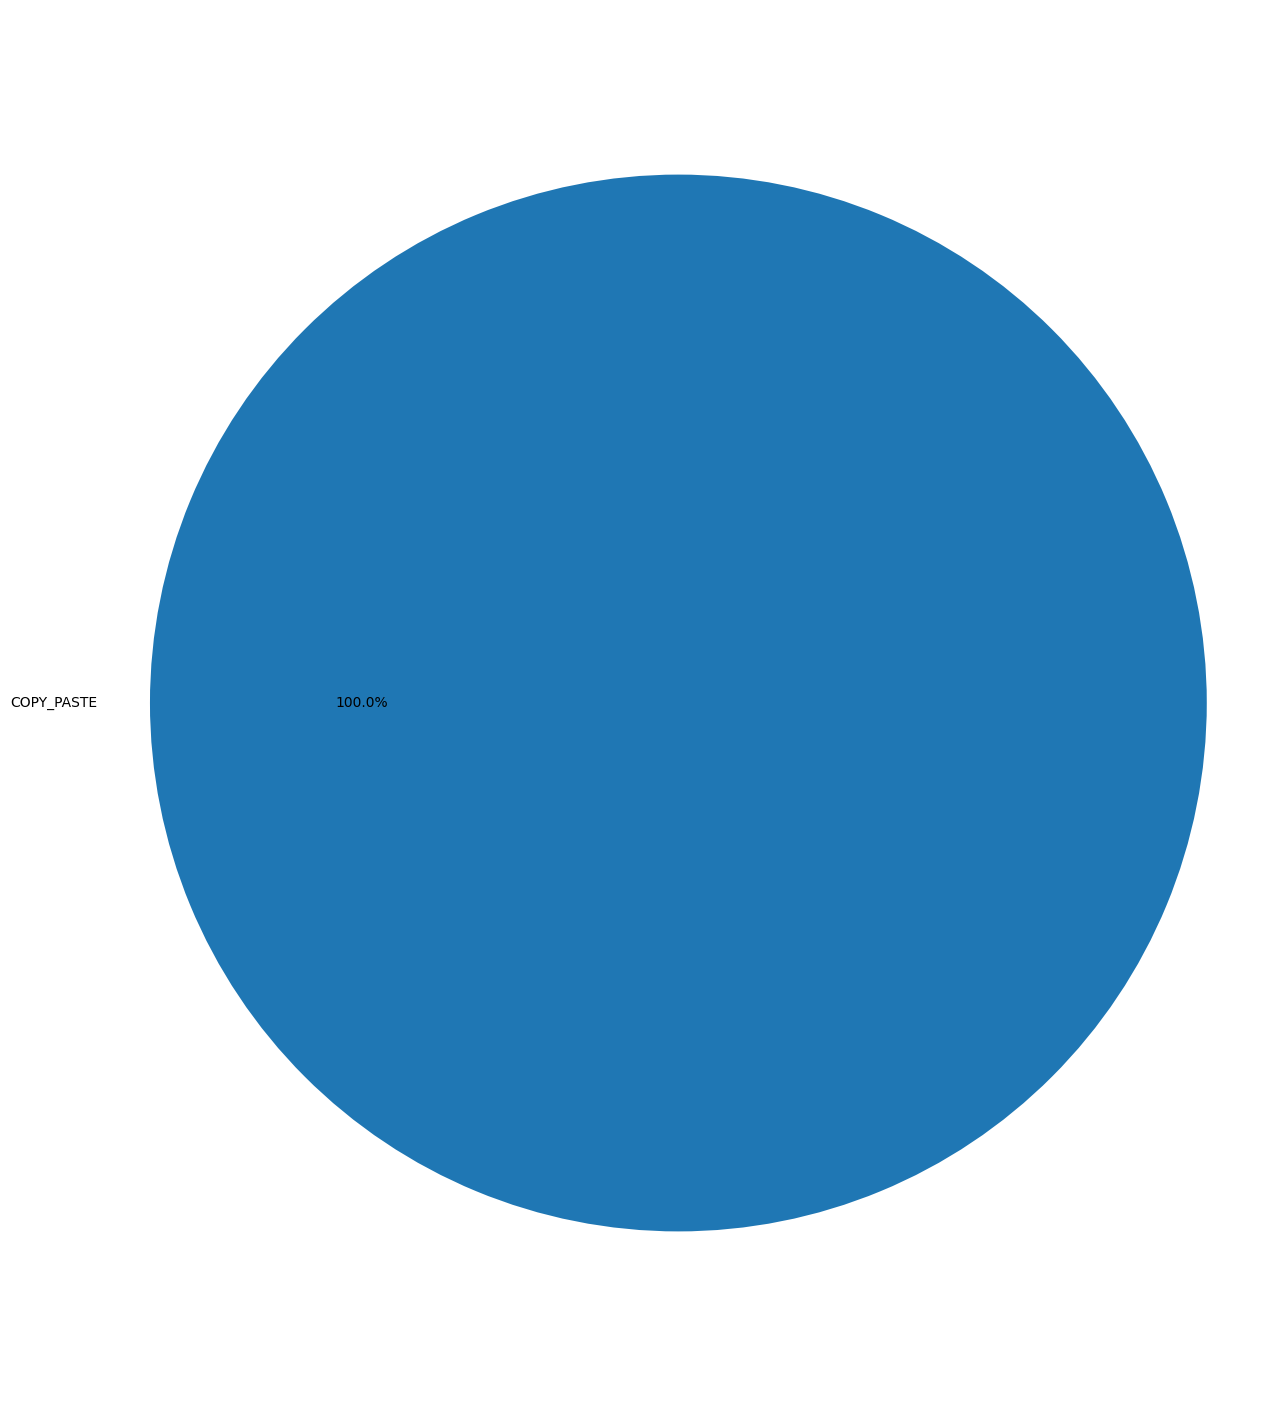

In [7]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import matplotlib.pyplot as plt
def sharing_service(video_id):
    SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']

    API_SERVICE_NAME = 'youtubeAnalytics'
    API_VERSION = 'v2'
    CLIENT_SECRETS_FILE = 'xav_client.json'

    def get_service():
        flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
        credentials = flow.run_local_server()
        # alternatively (https://github.com/onlyphantom/youtube_api_python/pull/3/files):
        # credentials = flow.run_local_server()
        return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

    def execute_api_request(client_library_function, **kwargs):
        response = client_library_function(
            **kwargs
        ).execute()
        return response

    if __name__ == '__main__':
        youtubeAnalytics = get_service()
        result = execute_api_request(
        youtubeAnalytics.reports().query,
        ids='channel==UCaufk4I0YqJZ-yIk8TNMS9w',
        startDate='2019-10-06',
        endDate='2063-10-31',
        metrics= 'shares',
        dimensions= 'sharingService',
        filters= f"video=={video_id}")

    sharing_dict = {}
    for i in range(len(result["rows"])):
        key = result["rows"][i][0]
        value = result["rows"][i][1]
        sharing_dict[f"{key}"] = value

    sum_dict = sum(sharing_dict.values())
    for i in sharing_dict:
        sharing_dict[i] = (sharing_dict[i]/ sum_dict) *100

    print(sharing_dict)
    # Extracting the values and labels from the dictionary
    labels = sharing_dict.keys()
    sizes = sharing_dict.values()

    plt.figure(figsize=(15,18))
    # Creating the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Displaying the chart
    plt.show()
    
sharing_service("3jIVYYyIQSc")


## Playback Location

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=Tysznn4L8fz1aodIn2uOJjlHPUqtMH&access_type=offline


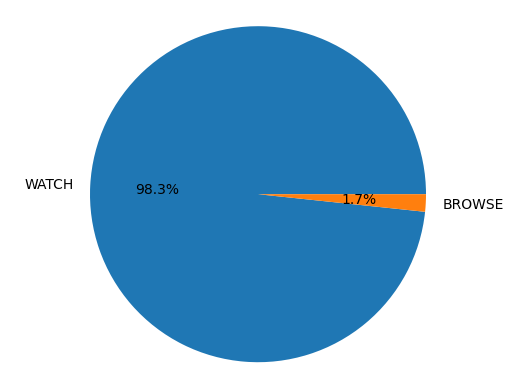

In [12]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import matplotlib.pyplot as plt


def playback_location(video_id):
    SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']
    API_SERVICE_NAME = 'youtubeAnalytics'
    API_VERSION = 'v2'
    CLIENT_SECRETS_FILE = 'xav_client.json'

    def get_service():
        flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
        credentials = flow.run_local_server()
        # alternatively (https://github.com/onlyphantom/youtube_api_python/pull/3/files):
        # credentials = flow.run_local_server()
        return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

    def execute_api_request(client_library_function, **kwargs):
        response = client_library_function(
            **kwargs
        ).execute()
        return response

    if __name__ == '__main__':
        youtubeAnalytics = get_service()
        result = execute_api_request(
        youtubeAnalytics.reports().query,
        ids='channel==UCaufk4I0YqJZ-yIk8TNMS9w',
        startDate='2010-10-06',
        endDate='2063-10-31',
        metrics= 'estimatedMinutesWatched,views',
        dimensions= 'insightPlaybackLocationType',
        filters= f"video=={video_id}")
    playback_dict = {}
    for i in range(len(result["rows"])):
        key = result["rows"][i][0]
        value = result["rows"][i][1]
        playback_dict[f"{key}"] = value

    sum_dict = sum(playback_dict.values())
    for i in playback_dict:
        playback_dict[i] = (playback_dict[i]/ sum_dict) *100

    
    # Extracting the values and labels from the dictionary
    labels = playback_dict.keys()
    sizes = playback_dict.values()

    # Creating the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Displaying the chart
    plt.show()

playback_location("NX5tWv2twvs")

## Subscribe 

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=kVscg06K6wfONurnRAvIMOdDBswVuR&access_type=offline
{}


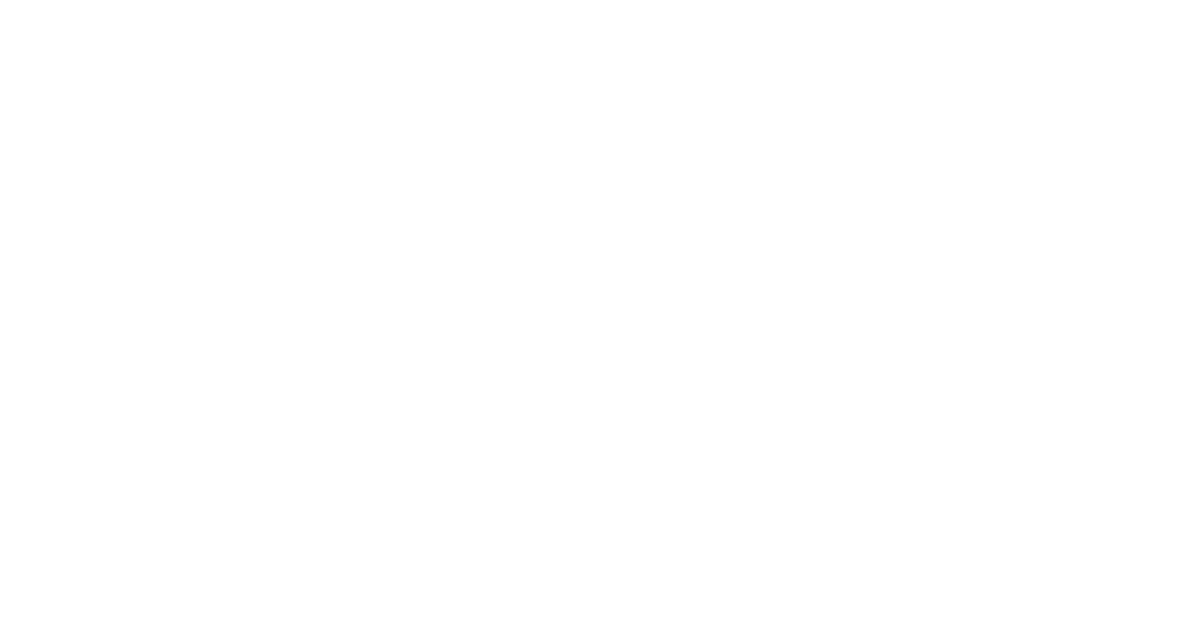

In [5]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import matplotlib.pyplot as plt

def sub_status(video_id):
    SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']
    API_SERVICE_NAME = 'youtubeAnalytics'
    API_VERSION = 'v2'
    CLIENT_SECRETS_FILE = 'xav_client.json'

    def get_service():
        flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
        credentials = flow.run_local_server()
        # alternatively (https://github.com/onlyphantom/youtube_api_python/pull/3/files):
        # credentials = flow.run_local_server()
        return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)
    

    def execute_api_request(client_library_function, **kwargs):
        response = client_library_function(
            **kwargs
        ).execute()
        return response
    
    if __name__ == '__main__':
        youtubeAnalytics = get_service()
        result = execute_api_request(
        youtubeAnalytics.reports().query,
        ids='channel==UCaufk4I0YqJZ-yIk8TNMS9w',
        startDate='2019-10-06',
        endDate='2023-10-31',
        metrics= 'estimatedMinutesWatched,views,likes,shares,videosAddedToPlaylists',
        dimensions= 'subscribedStatus',
        filters= f"video=={video_id}")

    sub_dict = {}
    for i in range(len(result["rows"])):
        key = result["rows"][i][0]
        value = result["rows"][i][2]  
        sub_dict[f"{key}"] = value

    sum_dict = sum(sub_dict.values())
    for i in sub_dict:
        sub_dict[i] = (sub_dict[i]/ sum_dict) *100

        
    # Extracting the values and labels from the dictionary
    labels = sub_dict.keys()
    sizes = sub_dict.values()
    print(sub_dict)
    # Creating the pie chart
    plt.figure(figsize=(15,8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Displaying the chart
    plt.show()
sub_status("q80dxQ8xetc")

## Device Type

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=4rXf2S1cGuLYvEqKlw1bg19m3SO17T&access_type=offline


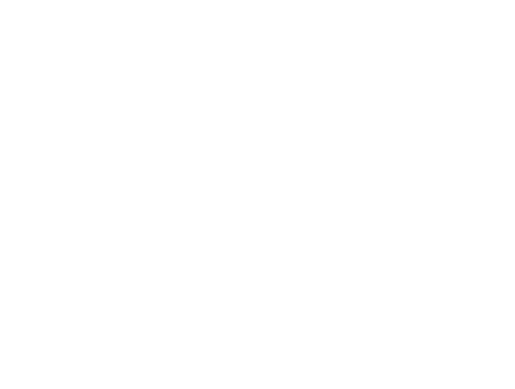

In [2]:

from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import matplotlib.pyplot as plt

def device_type(video_id):
    SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']
    API_SERVICE_NAME = 'youtubeAnalytics'
    API_VERSION = 'v2'
    CLIENT_SECRETS_FILE = 'xav_client.json'

    def get_service():
        flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
        credentials = flow.run_local_server()
        # alternatively (https://github.com/onlyphantom/youtube_api_python/pull/3/files):
        # credentials = flow.run_local_server()
        return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

    def execute_api_request(client_library_function, **kwargs):
        response = client_library_function(
            **kwargs
        ).execute()
        return response


    if __name__ == '__main__':
        youtubeAnalytics = get_service()
        result = execute_api_request(
            youtubeAnalytics.reports().query,
            ids='channel==UCaufk4I0YqJZ-yIk8TNMS9w',
            startDate='2019-10-06',
            endDate='2023-10-31',
            metrics= 'estimatedMinutesWatched',
            dimensions= 'operatingSystem,deviceType',
            filters= f"video=={video_id}"
            
        )
    
    device_dict = {}
    for i in range(len(result["rows"])):
        key = result["rows"][i][0] +" " +result["rows"][i][1]
        value = result["rows"][i][2]
        device_dict[f"{key}"] = value

    sum_dict = sum(device_dict.values())
    for i in device_dict:
        device_dict[i] = (device_dict[i]/ sum_dict) *100

    
    # Extracting the values and labels from the dictionary
    labels = device_dict.keys()
    sizes = device_dict.values()

    # Creating the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Displaying the chart
    plt.show()

device_type("NX5tWv2twvs")

## Time Based Data


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=rWNewXacokRWPURHco5rwoOK4qclsp&access_type=offline


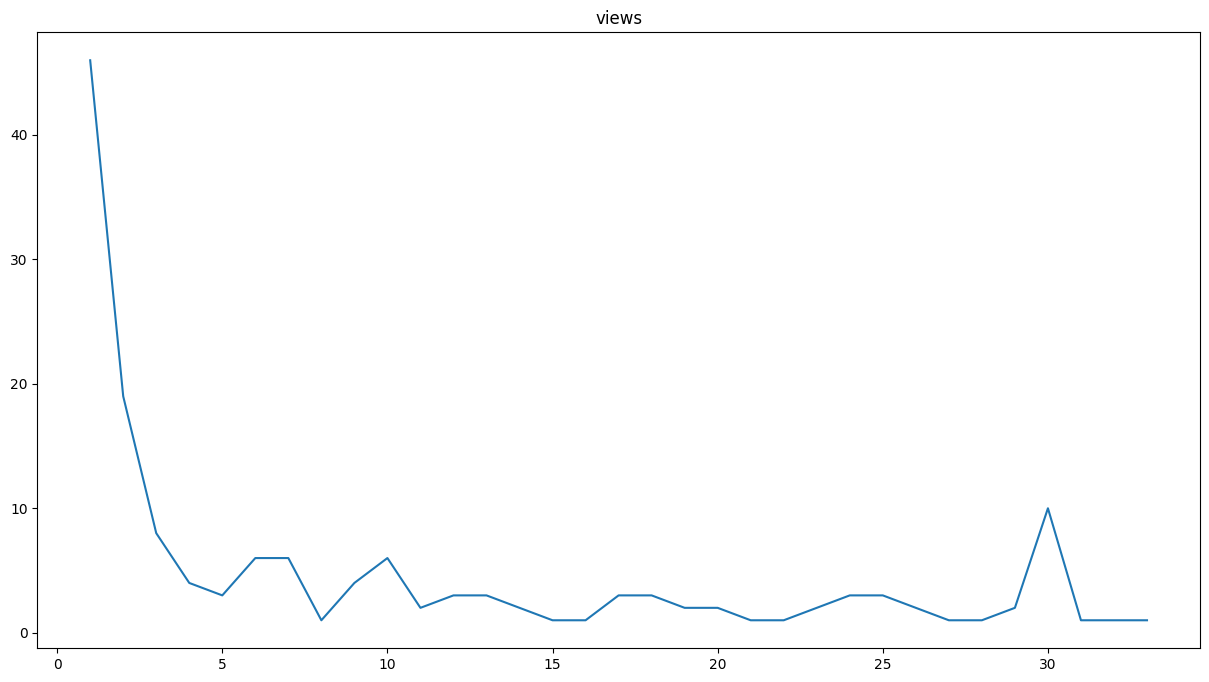

In [4]:

from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import matplotlib.pyplot as plt

SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']
API_SERVICE_NAME = 'youtubeAnalytics'
API_VERSION = 'v2'
CLIENT_SECRETS_FILE = 'xav_client.json'

def get_service():
  flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
  credentials = flow.run_local_server()
  # alternatively (https://github.com/onlyphantom/youtube_api_python/pull/3/files):
  # credentials = flow.run_local_server()
  return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

def execute_api_request(client_library_function, **kwargs):
  response = client_library_function(
    **kwargs
  ).execute()
  return response

video_ids = ["lYjvJS686Hs", ]
if __name__ == '__main__':
    youtubeAnalytics = get_service()
    for i in video_ids:
        result = execute_api_request(
          youtubeAnalytics.reports().query,
          ids='channel==UCaufk4I0YqJZ-yIk8TNMS9w',
          startDate='2023-11-06',
          endDate='2063-11-27',
          metrics= 'estimatedMinutesWatched,views,likes,comments,subscribersGained,shares,videosAddedToPlaylists,averageViewPercentage',
          dimensions= 'day',
          filters= f"video=={i}"
          
       )
        date = []
        views = []
        estimated_min =[]
        for i in range(len(result["rows"])):
            date.append(result["rows"][i][0][-2] + result["rows"][i][0][-1])
            views.append(result["rows"][i][2])
            # estimated_min.append(result["rows"][i][1])
        date = range(1,34)
        plt.figure(figsize=(15,8))
        plt.plot(date, views)
        plt.title("views")



In [1]:

from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import matplotlib.pyplot as plt

SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']
API_SERVICE_NAME = 'youtubeAnalytics'
API_VERSION = 'v2'
CLIENT_SECRETS_FILE = 'xav_client.json'

def get_service():
  flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
  credentials = flow.run_local_server()
  # alternatively (https://github.com/onlyphantom/youtube_api_python/pull/3/files):
  # credentials = flow.run_local_server()
  return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

def execute_api_request(client_library_function, **kwargs):
  response = client_library_function(
    **kwargs
  ).execute()
  return response

video_ids = ["lYjvJS686Hs","lYjvJS686Hs" ]
if __name__ == '__main__':
    youtubeAnalytics = get_service()
    for i in video_ids:
        result = execute_api_request(
          youtubeAnalytics.reports().query,
          ids='channel==UCaufk4I0YqJZ-yIk8TNMS9w',
          startDate='2023-11-06',
          endDate='2063-11-27',
          dimensions="elapsedVideoTimeRatio",
          metrics="audienceWatchRatio,relativeRetentionPerformance",
          filters= f"video=={i}")
        df = pd.DataFrame(result["rows"])
        x = df[0].to_list()
        y1 = df[0].to_list()
        y2 = df[0].to_list()
      




Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=700561766577-d307303isgapjpl69e7lgtv2gitc665l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=YFZPPbF1VuFzkVetRl6B0XgFuOf1S2&access_type=offline


In [8]:
import pandas as pd
df = pd.DataFrame(result["rows"])
x = df[0].to_list()
y1 = df[0].to_list()
y2 = df[0].to_list()

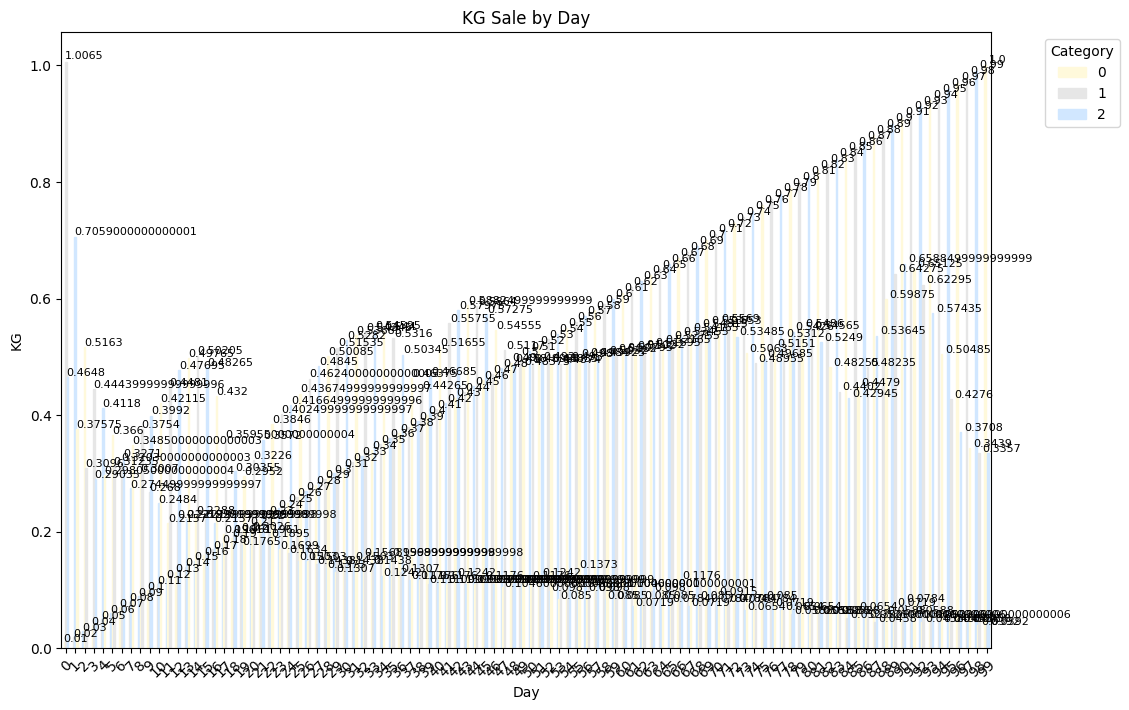

In [9]:

import matplotlib.pyplot as plt
import numpy as np

# Define an expanded "nude" color palette with a wider range of colors
nude_palette = [
    '#dac0ff', '#c4ffdb', '#fffac0', '#ead7b1', '#e6e6e6', '#d4a5ff', '#bfffe0', '#ffd0bf', 
    '#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff', '#bdb2ff', '#ffc6ff', 
    '#f9f2ff', '#fff9db', '#f7ffdb', '#dcffd6', '#dbfffd', '#d1e7ff', '#e4d7ff', '#f6b6ff'
]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the size of the plot
bars = df.plot(kind='bar', stacked=False, ax=ax)

# Add exact revenue values as labels with smaller font size
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)

# Customize the plot
plt.title('KG Sale by Day')  # Simplified title formatting
plt.xlabel('Day')
plt.ylabel('KG')

# Ensure that if there are two videos to be compared in six ways, the plot displays two distinct colors for each video
num_colors = min(len(df.columns), len(nude_palette))  # Ensure we have enough colors for each video
colors = np.random.choice(nude_palette, num_colors, replace=False)

# Assign colors to each video
color_dict = dict(zip(df.columns, colors))

# Apply colors to the bars based on video
for i, (column, color) in enumerate(color_dict.items()):
    for j, patch in enumerate(bars.patches):
        if j % len(df.columns) == i:
            patch.set_color(color)

# Match legend colors with bar colors
legend_handles, legend_labels = ax.get_legend_handles_labels()
ax.legend(legend_handles, legend_labels, title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Show the plot
plt.show()